##Importing Libraries

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression

##Load dataset

In [127]:
data = pd.read_csv('/content/drive/MyDrive/ml/oasis/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [128]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


##data preparation

In [129]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no missing values in given dataset

In [130]:
print('data information\n')
data.info()

data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [131]:
data.duplicated().sum()

0

there is no redundancy in the dataset

In [132]:
data.set_index('Id',inplace=True)

In [133]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Given dataset is balanced dataset

In [134]:
numerical = data.columns[data.dtypes!=object]
categorical = ['Species']

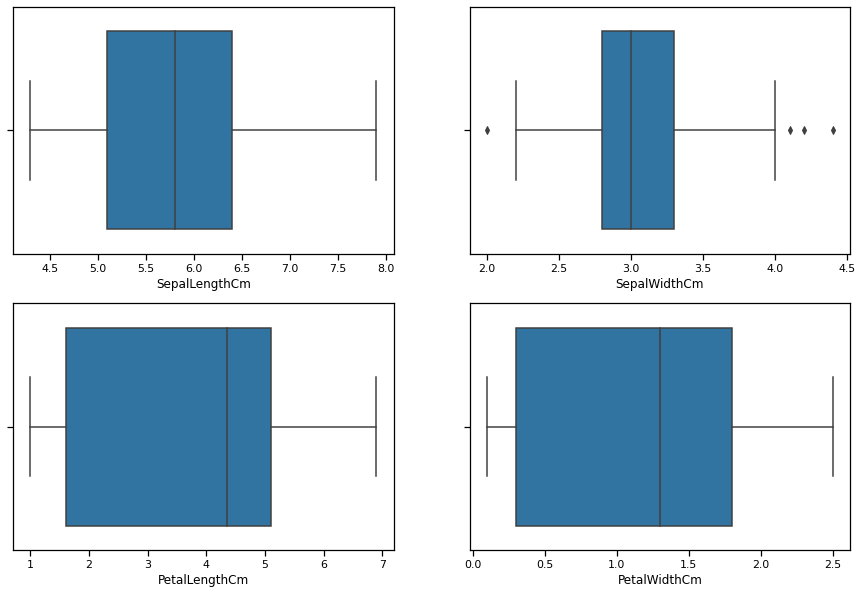

In [135]:
sns.set_context('notebook')
x = y = 0
fig,ax = plt.subplots(2,2,figsize=(15,10))
for col in numerical:
  sns.boxplot(data=data,x=col,ax=ax[x][y])
  y+=1
  if y==2:
    x+=1
    y=0

In [136]:
ind = data.index[(data['SepalWidthCm']>4.0) | (data['SepalWidthCm']<2.1)]
data.drop(ind,axis=0,inplace=True)

removed outliers based on the above boxplots

In [137]:
data['Petal'] = data['PetalLengthCm'] + data['PetalWidthCm']

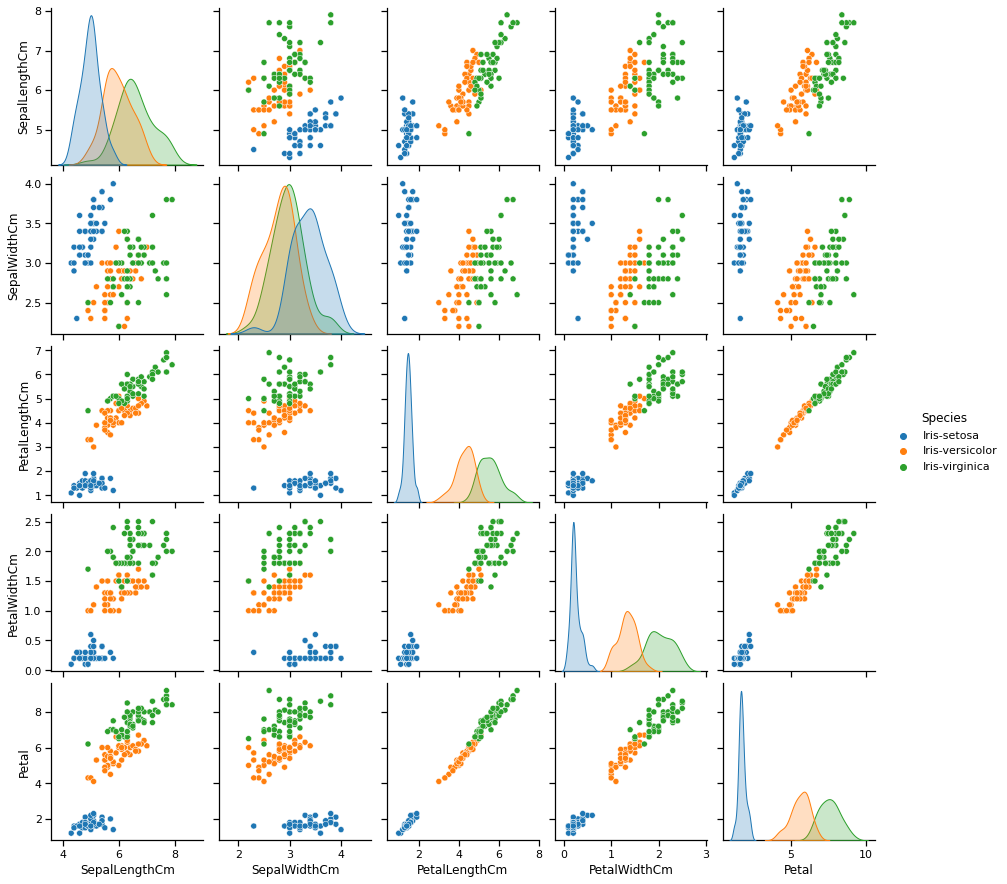

In [138]:
sns.pairplot(data=data,hue='Species')

from the above pairplot,

we can see that petal Width and petal length separates iris-setosa very well

sepal length and sepal width are not separating any category well

sum of petal length and petal width gives same information so petal length and petal width are not giving more information

so, I removed petal length and petal width attributes

In [139]:
data1 = data.drop(['PetalLengthCm','PetalWidthCm'],axis=1)

Visulizing the correlation between input features

<AxesSubplot:>

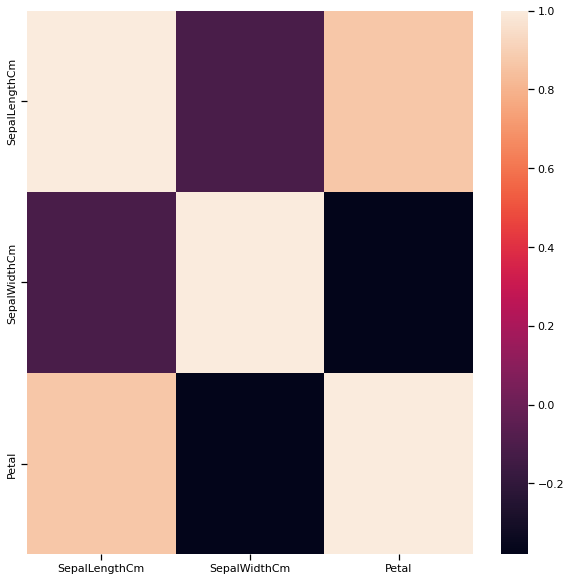

In [140]:
fig,ax=plt.subplots(figsize=(10,10))
cor = data1.corr()
sns.heatmap(cor)

In [141]:
numerical = data1.columns[data1.dtypes!=object]

In [142]:
for i in range(len(numerical)):
  cor.iloc[i,i] = 0.0
cor = cor.abs()

In [143]:
print('The following pairs are the most correlated features :\n')
cor.idxmax()

The following pairs are the most correlated features :



SepalLengthCm            Petal
SepalWidthCm             Petal
Petal            SepalLengthCm
dtype: object

In [144]:
X,y = data1.loc[:,data1.columns!='Species'],data1['Species']

In [145]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8457)

encoding the category feature 'Species'

scaling the numerical features

In [146]:
scaler = StandardScaler()
encoder = LabelEncoder()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test =pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

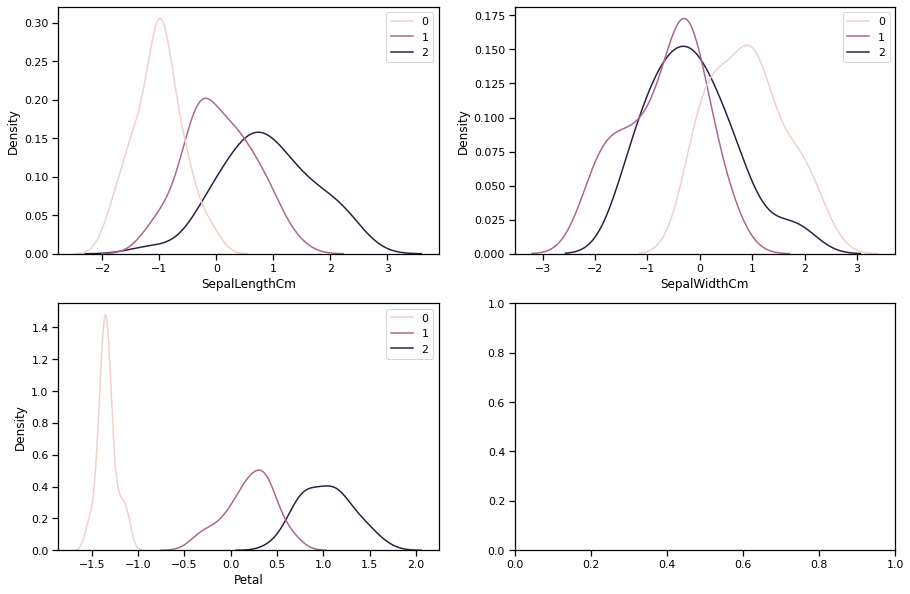

In [147]:
sns.set_context('notebook')
x = y = 0
fig,ax = plt.subplots(2,2,figsize=(15,10))
for col in numerical:
  sns.kdeplot(data=X_train,x=col,ax=ax[x][y],hue=y_train)
  y+=1
  if y==2:
    x+=1
    y=0

In [148]:
X_train.describe()

,SepalLengthCm,SepalWidthCm,Petal
count,1.160000e+02,1.160000e+02,1.160000e+02
mean,-2.185273e-15,4.249474e-16,-6.603913e-17
std,1.004338e+00,1.004338e+00,1.004338e+00
min,-1.867858e+00,-2.118731e+00,-1.533466e+00
25%,-9.096644e-01,-6.231561e-01,-1.294324e+00
50%,-7.124500e-02,-1.246312e-01,2.601017e-01
75%,6.474002e-01,6.231561e-01,7.882079e-01
max,2.444013e+00,2.367993e+00,1.655099e+00


##modelling

In [149]:
lclf = LogisticRegression(warm_start=True,n_jobs=-1)
classifier = GridSearchCV(estimator=lclf,
                          param_grid={
                              'solver':['newton-cg', 'sag', 'saga', 'lbfgs'],
                              'C':[10,5,1.0]
                          })
classifier.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(n_jobs=-1, warm_start=True),
             param_grid={'C': [10, 5, 1.0],
                         'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']})

GridSearchCV selects the model with best parmeters from given param_grids

as you can see parameters {'C': 1.0, 'solver': 'newton-cg'} classifies the data points well

In [150]:
classifier.best_params_

{'C': 1.0, 'solver': 'newton-cg'}

In [151]:
precision_recall_fscore_support(y_test,classifier.predict(X_test))

(array([1.        , 0.83333333, 1.        ]),
 array([0.9, 1. , 0.9]),
 array([0.94736842, 0.90909091, 0.94736842]),
 array([10, 10, 10]))

got roc_auc_score 99%

In [152]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,classifier.predict_proba(X_test),multi_class='ovr')

0.9933333333333333